<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
<p style="margin: 0; text-align:right;">2023-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: Juan Lara Chups </strong>
</div>

# PEC 4: Combinación de modelos de regresión

Está actividad está dividida en cuatro partes:

- **[Carga y ajuste de la base de datos MI - 0.5 ptos](#ej1)**: Cargar los datos. Realizar los procedimientos estadísticos necesarios que considere necesarios para entener la base de datos.
- **[Combinación paralela de clasificadores - 3 ptos](#ej2)**: Estudio de diferentes métodos de combinación de clasificadores en paralelo: árboles de decisión, Bagging, and Boosting.
- **[Combinación secuencial de clasificadores - 3 ptos ](#ej3)**: Estudio de diferentes métodos de combinación de clasificadores en secuencia: KNN, SVM, Stacking, y Cascading.
- **[Conclusión de los métodos de clasificación aplicados a los problema - 1 pto ](#ej5)**: Analizar cuál de las herramientas de clasificación utilizadas es la mejor para el problema del planteado.
- **[Redes nueronales secuencial  y paralela - 2.5 ptos](#ej4)**: Construcción de dos redes nueronales con diferentes topologías serie y paralelo (2 ptos) y representación de los resultados en la matriz de confusión para cada topología - 0.5 ptos. Para ello se utilizará la base de datos iris. El objetivo será categorizar las flores según sus medidas físicas.



<u>Consideraciones generales</u>:

- IMPORTANTE: **Para este PEC se sugiere la utilización del entorno COLAB** para facilitar la cargada de las librerías y el procesamiento del numeral 2.
- La solución planteada no puede utilizar métodos, funciones o parámetros declarados **_deprecated_** en futuras versiones, a excepción de que se indique explícitamente.
- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.
- En esta PEC se deben usar **únicamente las librerías que se importan a continuación**. Si se desea usar otra librería hay que consultarlo con el tutor/tutora del aula.

<u>Formato de la entrega</u>:

- Algunos ejercicios pueden suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML. **POR FAVOR NO SUBIR UN SOLO ARCHIVO COMPRIMIDO**.
- El nombre de los archivos debe tener su **NOMBRE_APELLIDO**.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

<u>Infarto de Miocardio (IM)</u>:

El Infarto de Miocardio (IM) es uno de los problemas más desafiantes de la medicina moderna. El infarto agudo de miocardio se asocia con una alta mortalidad en el primer año posterior al mismo. La incidencia de IM sigue siendo alta en todos los países. Esto es especialmente cierto para la población urbana de países altamente desarrollados, que está expuesta a factores de estrés crónico, nutrición irregular y no siempre equilibrada. El curso de la enfermedad en pacientes con infarto de miocardio es diferente. El IM puede ocurrir sin complicaciones o con complicaciones que no empeoran el pronóstico a largo plazo. Al mismo tiempo, aproximadamente la mitad de los pacientes en los períodos agudo y subagudo tienen complicaciones que conducen al empeoramiento de la enfermedad e incluso a la muerte. Incluso un especialista experimentado no siempre puede prever el desarrollo de estas complicaciones. En este sentido, la predicción de las complicaciones del infarto de miocardio para llevar a cabo oportunamente las medidas preventivas necesarias es una tarea importante.

Iniciamos la PEC con la carga de las siguientes librerías:

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import svm

%matplotlib inline

Las siguientes tres celdas se cargarán de forma automática si usted está trabajando con COLAB. Los puntos suspensivos serán reemplazados por sus carpetas personales.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.listdir('/content/drive/My Drive/...')


In [ ]:
import os
os.chdir('/content/drive/My Drive/...')


<a id="ej2"></a>

# 1. Combinación de clasificadores (7.5 puntos)

El ensemble learning es una estrategia en la que se utiliza un grupo de modelos para resolver un problema mediante la combinación estratégica de diversos modelos de aprendizaje automático en un sólo modelo predictivo.

En general, los métodos de ensemble se utilizan principalmente para mejorar la precisión del rendimiento general de un modelo y combinar varios modelos diferentes, también conocidos como aprendices básicos, para predecir los resultados, en lugar de utilizar un sólo modelo.

¿Por qué entrenamos tantos clasificadores diferentes en lugar de uno solo? Bueno, el uso de varios modelos para predecir el resultado final en realidad reduce la probabilidad de sopesar las decisiones tomadas por modelos deficientes (sobreentrenados, no debidamente ajustados...).

Cuanto más diversos sean estos aprendices básicos, más poderoso será el modelo final.

Tengamos en cuenta que en cualquier modelo de aprendizaje automático, el error de generalización viene dado por la suma de cuadrados de bias + varianza + error irreductible.

¡Los errores irreductibles son algo que está más allá de nosotros! No podemos reducirlos.

Sin embargo, utilizando ensembles, podemos reducir el sesgo (bias) y la varianza de un modelo. Esto reduce el error de generalización general.

La <strong>compensación de sesgo-varianza</strong> es el punto de referencia más importante que diferencia un modelo robusto de uno inferior (entendamos por inferior un modelo no demasiado generalizable).

Aunque no es una regla exacta, en el aprendizaje automático, los modelos que tienen un sesgo alto tienden a tener una varianza más baja y viceversa.

Hemos estado hablando de bias y varianza. Pero veamos que entendemos por sesgo de un modelo y por varianza de un modelo.

1. <strong>Sesgo</strong>: El sesgo es un error que surge debido a suposiciones falsas realizadas en la fase de aprendizaje de un modelo. Un sesgo alto puede hacer que un algoritmo de aprendizaje omita información importante y correlaciones entre las variables independientes y las etiquetas de clase, por lo que no se ajusta al modelo.

2. <strong>Varianza</strong>: la varianza nos dice qué tan sensible es un modelo a los pequeños cambios en los datos de entrenamiento. Es decir, cuánto cambia el modelo. Una gran variación en un modelo lo hará propenso al ruido aleatorio presente en el conjunto de datos, por lo que se ajustará demasiado al modelo.

Para comprender con más detalle la compensación de sesgo y varianza en los modelos de aprendizaje automático, podeís consultar este [artículo](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229).

Una vez llegados a este punto, podemos dividir los ensembles en cuatro categorías:

1. <strong>Bagging</strong>: El bagging se utiliza principalmente para reducir la variación en un modelo. Un ejemplo simple de bagging es el algoritmo Random Forest.

2. <strong>Boosting</strong>: El boosting se utiliza principalmente para reducir el sesgo en un modelo. Ejemplos de algoritmos de impulso son Ada-Boost, XGBoost, árboles de decisión mejorados por gradiente, etc.

3. <strong>Stacking</strong>: el stacking se utiliza principalmente para aumentar la precisión de predicción de un modelo.

4. <strong>Cascading</strong>: esta clase de modelos son muy precisos. La conexión en cascada se usa principalmente en escenarios en los que no puede permitirse cometer un error. Por ejemplo, una técnica en cascada se usa principalmente para detectar transacciones fraudulentas con tarjetas de crédito.








El ensemble learning es una estrategia sofisticada que implica la utilización de múltiples modelos para abordar un problema mediante la combinación estratégica de diversos modelos de aprendizaje automático en un modelo predictivo consolidado.

En general, los métodos de conjunto se utilizan principalmente para mejorar la precisión del rendimiento general de un modelo mediante la combinación de diversos modelos, conocidos como aprendices básicos, para predecir resultados, en lugar de utilizar solo un modelo.

La diversidad entre los aprendices básicos es crucial para el éxito de esta estrategia, ya que contribuye a reducir la probabilidad de ponderar decisiones tomadas por modelos deficientes, como aquellos que pueden estar sobreentrenados o inadecuados.

En cualquier modelo de aprendizaje automático, el error de generalización se compone de sesgo, varianza y un error irreductible. Los errores irreductibles son inherentemente incontrolables, pero los métodos de conjunto, mediante la compensación de sesgo y varianza, tienen como objetivo reducir tanto el sesgo como la varianza para mejorar el rendimiento global del modelo.

La compensación de sesgo-varianza es un concepto clave que distingue un modelo robusto de uno inferior en el aprendizaje automático. En general, los modelos con alto sesgo tienden a tener una varianza baja y viceversa, aunque esta regla no es absoluta.

Las categorías principales de conjuntos son las siguientes:

Bagging: Utilizado para reducir la varianza en un modelo. Un ejemplo destacado es el algoritmo Random Forest.

Boosting: Empleado para reducir el sesgo en un modelo. Ejemplos incluyen AdaBoost, XGBoost y árboles de decisión mejorados por gradiente.

Stacking: Dirigido a aumentar la precisión de la predicción de un modelo mediante la combinación de múltiples modelos.

Cascading: Utilizado en escenarios donde la precisión es crítica. Esta categoría es especialmente eficaz en la detección de transacciones fraudulentas con tarjetas de crédito, ya que se centra en reducir los errores al máximo.

Para una comprensión más profunda de la compensación de sesgo y varianza en los modelos de aprendizaje automático, puedes consultar este artículo.

## 1.1 Datos (0.5 ptos)

La base de datos original consta de 1700 pacientes con 124 variables registradas. Existen valores faltantes y outlayers. En esta base de datos original, las columnas 2-112 son los descriptores o variables para predecir posibles complicaciones o respuestas que están en las columnas 113-124. La descripción detallada y los datos están disponibles en el siguiente [enlace](https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications#).

Es una base de datos lista para trabajar. Debeís cargar una base de datos llamada MI_database_final.csv. Los valores faltantes ya están imputados y los outlayers han sido eliminados e imputados. Igualmente las variables han sido reducidas a las más relevantes teniendo en cuenta el outcome que será ZSN_A. Es una variable categórica Significa la presencia de Insuficiencia Cardíaca (IC) crónica en la anamnesis.

Para iniciar cualquier análisis, lo primero que debe hacer es el análisis univariable, diagramas de distribución utilizando histogramas o diagramas de barras de acuerdo a la naturaleza de la variable. Para identificar los valores extremos, realice diagramas de caja o box plot. En caso que existan, estos deben ser eliminados y se considerarán como faltantes. En caso de necesidad de ajustar un nuevo valor calculelo utilizando la regresión lineal. Después, se hará una exploración de las variables más relevantes de acuerdo al output seleccionado, se identificarán estas variables y serán incluídas en los modelos de clasificación. Se estudiarán diferentes modelos y al final deberá decidir cuál de los modelos

En la primera parte de este ejercicio veremos la combinación de clasificadores en paralelo mediante las tecnicas de <strong>Bagging</strong> y <strong>Boosting</strong>.

En la segunda parte intentaremos mejorar los resultados aplicando tecnicas de combinación secuencial de clasificadores: <strong>Stacking</strong> y <strong>Cascading</strong>.

Para empezar, cargue el dataset.

In [5]:
df = pd.read_csv("MI_database_final-1.csv")

Visualize las primeras filas

In [6]:
df.head()

,ID,L_BLOOD,AGE,ALT_BLOOD,K_BLOOD,ROE,S_AD_ORIT,AST_BLOOD,Na_BLOOD,TIME_B_S,...,GIPER_Na,ritm_ecg_p_04,fibr_ter_03,GT_POST,fibr_ter_06,np09,zab_leg_04,n_r_ecg_p_02,n_p_ecg_p_05,ZSN_A
0,1,8.0,77.0,0.38,4.7,16.0,180.0,0.22,138.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,7.8,55.0,0.38,3.5,3.0,120.0,0.18,132.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,10.8,52.0,0.30,4.0,10.0,180.0,0.11,132.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,8.0,68.0,0.75,3.9,10.0,120.0,0.37,146.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,8.3,60.0,0.45,3.5,10.0,160.0,0.22,132.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para poder probar varios modelos, primero vamos a dividir el dataset entre train y test. El outcome es ZSN_A. Además, para obtener los mismos resultados y poder comentar dudas en el foro/correo, se fijará el seed = 13.

Como en este ejercicio se utilizará stacking y cascading, y ambos se aplican sobre el conjunto de test, se hará un split del 60% para tener un poco más de base al aplicar estas dos técnicas.

In [7]:
#division del dataset en varuable objetivo y explicaticas
X = df.drop('ZSN_A', axis=1)
y = df['ZSN_A']

#division del conjunto train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=13)

## 1.2. Combinación paralela de clasificadores (3 puntos)

### 1.2.1. Árboles de decisión

Para poder comparar el aumento de performance obtenido a medida que vamos aplicando técnicas nuevas, utilizaremos como baseline un simple árbol de decisión.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un árbol de decisión con profundidad máxima de 3 niveles (aplicaremos la misma restricción en las siguientes secciones), utilizando la semilla definida en el apartado anterior y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el árbol de decisión sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy'). <strong>Sugerencia:</strong> usar el módulo <strong>cross_val_score</strong> de <strong>sklearn</strong>.
</div>

Para aprender más sobre <strong>cross validation</strong> y sobre como usar estos módulos, os recomendamos los siguientes enlaces:
- [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [12]:
#Se crea el modelo de aprendizaje supervisado tree.
mas_tree = DecisionTreeClassifier(max_depth=3, random_state=13)

cross_val_accuracy = cross_val_score(mas_tree, X_train, y_train, cv=5, scoring='accuracy')
print("Precision de la validacion cruzada en 5 conjuntos:", cross_val_accuracy)
print("Precisión con validación cruzada en train:", np.mean(cross_val_accuracy))

mas_tree.fit(X_train, y_train)

test_accuracy = mas_tree.score(X_test, y_test)
print("Precisión en test:", test_accuracy)

Precision de la validacion cruzada en 5 conjuntos: [0.91911765 0.91911765 0.88970588 0.91176471 0.88970588]
Precisión con validación cruzada en train: 0.9058823529411765
Precisión en test: 0.8784313725490196


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> Analizad los resultados obtenidos.
</div>

<div class="alert alert-block alert-success">
<strong>

Respuesta: Los resultados de la validacion cruzada muestran unos valores bastante favorables en la precision (+88%). Por lo que, al entrenar el modelo y enfrentarse a los datos nuevos recogidos en en las variables test muestra una precision del 88%.

Cabe destacar que la precision alta no siempre refleja que nuestro modelo sea el idoneo, ya que entra en juego si existe sobreentrenamiento o la naturaleza de la variable Y que queramos predecir. </strong>


</div>

### 1.2.2. Bagging

La idea central del bagging es usar réplicas del conjunto de datos original y usarlas para entrenar diferentes clasificadores.

Crearemos subconjuntos muestreando aleatoriamente un montón de puntos del conjunto de datos de entrenamiento con reemplazo.

Ahora entrenaremos clasificadores individuales en cada uno de estos subconjuntos bootstrap.

Cada uno de estos clasificadores base predecirá la etiqueta de clase para un problema dado. Aquí es donde combinamos las predicciones de todos los modelos base. Esta parte se llama etapa de agregación. Es por eso que encontraréis los ensembles bagging por el nombre de ensembles de agregación.

Por lo general, se usa un voto de mayoría simple en un sistema de clasificación y se toma la media de todas las predicciones para los modelos de regresión para combinar todos los clasificadores base en un solo modelo y proporcionar el resultado final del modelo de conjunto.

Un ejemplo simple de tal enfoque es el algoritmo Random Forest. El bagging reduce la alta variación (varianza) de un modelo, reduciendo así el error de generalización. Es un método muy eficaz, especialmente cuando tenemos datos muy limitados con pudiera ser nuestro caso.

Mediante el uso de muestras de bootstrap, podemos obtener una estimación agregando las puntuaciones de muchas muestras.

<strong>¿Cómo haríamos bagging?</strong>

Supongamos que tenemos un conjunto de entrenamiento que contiene 100.000 puntos de datos.

Crearíamos N subconjuntos muestreando al azar 50K puntos de datos para cada subconjunto.

Cada uno de estos N subconjuntos se utilizará para entrenar N clasificadores diferentes.

En la etapa de agregación, todas estas N predicciones se combinarán en un solo modelo, también llamado metaclasificador.

De los 100.000 puntos presentes originalmente en el conjunto de datos, si eliminamos 1000 puntos, el impacto que tendrá en los conjuntos de datos muestreados será muy inferior.

Si pensamos intuitivamente, es posible que algunos de estos 1000 puntos no estén presentes en todos los conjuntos de datos muestreados y, por lo tanto, la cantidad de puntos que se eliminarán de cada conjunto de datos muestreados será muy inferior. ¡Incluso cero en algunos casos! En resumen, el impacto de eliminar 1000 puntos de este tipo será en realidad menor en los clasificadores base, lo que reducirá la variación en un modelo y lo hará más sólido.

La varianza no es más que sensibilidad al ruido, como hemos comentado anteriormente.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un Random Forest Classifier con 20 árboles de decisión y profundidad máxima de 3 niveles, utilizando la semilla definida al inicio del segundo ejercicio, y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el modelo sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy').
</div>

<strong>Sugerencia:</strong> Usar el módulo `RandomForestClassifier` de **sklearn**.

Para apender a usar este módulo os recomendamos el siguiente:
- [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=13)

cross_val_accuracy_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy')
print("Precision de la validacion en los 5 conjuntos:", cross_val_accuracy_rf)
print("Precisión con validación cruzada en train (Random Forest):", np.mean(cross_val_accuracy_rf))

random_forest_model.fit(X_train, y_train)

test_accuracy_rf = random_forest_model.score(X_test, y_test)
print("Precisión en test (Random Forest):", test_accuracy_rf)

Precision de la validacion en los 5 conjuntos: [0.91911765 0.91911765 0.91911765 0.91911765 0.91176471]
Precisión con validación cruzada en train (Random Forest): 0.9176470588235294
Precisión en test (Random Forest): 0.8803921568627451


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> Analizad los resultados obtenidos.
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:

Al igual que el anterior apartado se ha conseguido una precision favorable aunque esta vez se ha conseguido una precision en la validacion de los 5 conjuntos superior (91%).

De la misma manera, se ha aumentado la precision ajustando el modelo a los datos para los test mejores que el anterior.
</strong>


</div>

### 1.2.3. Boosting

El boosting se utiliza para convertir a los clasificadores de base débil en fuertes. Los clasificadores débiles generalmente tienen una correlación muy débil con las etiquetas de clase verdaderas y los clasificadores fuertes tienen una correlación muy alta entre el modelo y las etiquetas de clase verdaderas.

El boosting capacita a los clasificadores débiles de manera iterativa, cada uno tratando de corregir el error cometido por el modelo anterior. Esto se logra entrenando un modelo débil en todos los datos de entrenamiento, luego construyendo un segundo modelo que tiene como objetivo corregir los errores cometidos por el primer modelo. Luego construimos un tercer modelo que intenta corregir los errores cometidos por el segundo modelo y así sucesivamente. Los modelos se agregan de forma iterativa hasta que el modelo final ha corregido todos los errores cometidos por todos los modelos anteriores.

Cuando se agregan los modelos en cada etapa, se asignan algunos pesos al modelo que está relacionado con la precisión del modelo anterior. Después de agregar un clasificador débil, los pesos se vuelven a ajustar. Los puntos clasificados incorrectamente reciben pesos más altos y los puntos clasificados correctamente reciben pesos más bajos. Este enfoque hará que el siguiente clasificador se centre en los errores cometidos por el modelo anterior.

El boosting reduce el error de generalización tomando un modelo de alto bias y baja varianza y reduciendo el bias en un nivel significativo. Recuerde, el bagging reduce la varianza. Al igual que el bagging, el boosting también nos permite trabajar con modelos de clasificación y regresión.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un Gradient Boosting Classifier con 20 árboles de decisión y profundidad máxima de 3 niveles, utilizando la semilla definida al inicio del segundo ejercicio, y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el modelo sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy').
</div>
    
<strong>Sugerencia:</strong>
- Usar el módulo [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) de **sklearn**.

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=13)

cross_val_accuracy_gb = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5, scoring='accuracy')
print("Precision validacion sobre 5 conjuntos:", cross_val_accuracy_gb)
print("Precisión con validación cruzada en train:", np.mean(cross_val_accuracy_gb))

gradient_boosting_model.fit(X_train, y_train)

test_accuracy_gb = gradient_boosting_model.score(X_test, y_test)
print("Precisión en test:", test_accuracy_gb)


Precision validacion sobre 5 conjuntos: [0.89705882 0.88970588 0.90441176 0.90441176 0.89705882]
Precisión con validación cruzada en train: 0.8985294117647058
Precisión en test: 0.8705882352941177


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> Analizad los resultados obtenidos.
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:

En este caso se ha encontrado otra vez una precision bastante favorable superando los 88 puntos en los 5 conjutos de validacion.

Para el conjunto test con el modelo entrenado se consigue una precision del 87%. De los tres modelos entrenados hasta ahora este es el que peor precision muestra.
</strong>


</div>

## 1.3. Combinación secuencial de clasificadores base diferentes (3 puntos)

Para poder hacer combinación secuencial de modelos, necesitamos tener varios modelos diferentes entrenados. En nuestro caso, ya tenemos un árbol de decisión. Vamos a entrenar un par de modelos más.

### 1.3.1. KNN (k vecinos más próximos)

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un K-Neighbors Classifier con 2 vecinos y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el modelo sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy').</div>

In [19]:
k_neighbors_model = KNeighborsClassifier(n_neighbors=2)

cross_val_accuracy_kn = cross_val_score(k_neighbors_model, X_train, y_train, cv=5, scoring='accuracy')
print("Precision validacion de 5 conjuntos:", cross_val_accuracy_kn)
print("Precisión con validación cruzada en train (K-Neighbors):", np.mean(cross_val_accuracy_kn))

k_neighbors_model.fit(X_train, y_train)

test_accuracy_kn = k_neighbors_model.score(X_test, y_test)
print("Precisión en test (K-Neighbors):", test_accuracy_kn)

Precision validacion de 5 conjuntos: [0.90441176 0.91176471 0.91176471 0.91176471 0.90441176]
Precisión con validación cruzada en train (K-Neighbors): 0.9088235294117647
Precisión en test (K-Neighbors): 0.8754901960784314


### 1.3.2. SVM (Support Vector Machines)

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un SVM con gamma = 0.07 y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el modelo sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy').</div>

In [21]:
from sklearn.svm import SVC

svm_model = SVC(gamma=0.07)

cross_val_accuracy_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("Precision validación cruzada 5 conjuntos:", cross_val_accuracy_svm)
print("Precisión con validación cruzada en train:", np.mean(cross_val_accuracy_svm))

svm_model.fit(X_train, y_train)

test_accuracy_svm = svm_model.score(X_test, y_test)
print("Precisión en test:", test_accuracy_svm)

Precision validación cruzada 5 conjuntos: [0.91911765 0.91911765 0.91911765 0.91911765 0.91176471]
Precisión con validación cruzada en train: 0.9176470588235294
Precisión en test: 0.8803921568627451


### 1.3.3. Stacking

Todos los modelos individuales se entrenan por separado en el conjunto completo de datos de entrenamiento y se ajustan para lograr una mayor precisión. La compensación de bias y varianza se tiene en cuenta para cada modelo. El modelo final, también conocido como metaclasificador, se alimenta de las etiquetas de clase predichas por los modelos base o de las probabilidades predichas para cada etiqueta de clase. Luego, el metaclasificador se entrena en función de los resultados dados por los modelos base.

En el stacking, se entrena un nuevo modelo en función de las predicciones realizadas por los modelos anteriores. Este proceso se lleva a cabo de forma secuencial. Esto significa que varios modelos se entrenan en la etapa 1 y se ajustan con precisión. Las probabilidades pronosticadas de cada modelo de la etapa 1 se alimentan como entrada a todos los modelos en la etapa 2. Los modelos en la etapa 2 luego se ajustan con precisión y las salidas correspondientes se alimentan a los modelos en la etapa 3 y así sucesivamente. Este proceso se produce varias veces en función de la cantidad de capas de apilamiento que desee utilizar.

La etapa final consiste en un único modelo que nos da el resultado final al combinar el resultado de todos los modelos presentes en las capas anteriores.

A menudo, el uso de clasificadores apilables aumenta la precisión de predicción de un modelo. ¡Pero de ninguna manera puede garantizarse que el uso de apilamiento aumente la precisión de la predicción en todo momento! Echad un vistazo al siguiente [link](http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/).

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Construye un clasificador de tipo stacking usando un Gradient Boosting Classifier (con 20 árboles de decisión, profundidad máxima de 3 niveles y la semilla definida al inicio del segundo ejercicio) que use como atributos las predicciones hechas en el conjunto de test por los algoritmos: árbol de decisión, knn y svm. A continuación, calcula la precisión del modelo resultante con <strong>cross-validation</strong> en el conjunto de test (en este caso no tenemos conjunto de train, con lo cual se hace directamente cross-validation sobre test).
</div>

<strong>Sugerencia:</strong>
- Usar la función `column_stack` de <strong>numpy</strong> para juntar todas las predicciones.

Para más información, puedes consultar este enlace:
- [column_stack](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.column_stack.html)

In [22]:
from numpy import column_stack

tree_model = DecisionTreeClassifier(max_depth=3, random_state=13)
knn_model = KNeighborsClassifier(n_neighbors=2)
svm_model = SVC(gamma=0.07)

tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

stacked_predictions = column_stack((tree_pred, knn_pred, svm_pred))

stacking_model = GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=13)

stacking_cross_val_accuracy = cross_val_score(stacking_model, stacked_predictions, y_test, cv=5, scoring='accuracy')
print("Precisión con stacking y validación cruzada en test:", np.mean(stacking_cross_val_accuracy))


Precisión con stacking y validación cruzada en test: 0.8774509803921567


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> ¿Has conseguido mejorar la precisión gracias al stacking? Comenta los resultados.
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:

En este caso la precision utilizando el stacking no ha mejorado con respecto a los modelos individualmente.

Han sido mejores los modelos de arbol de decision y SVM de forma individual.

</strong>


</div>

### 1.3.4. Cascading

El caso de cascading es parecido al de stacking pero utilizando no solamente las predicciones parciales de los clasificadores base, sino también los datos originales.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Construye un clasificador de tipo cascading usando un Gradient Boosting Classifier (con 20 árboles de decisión, profundidad máxima de 3 niveles y la semilla definida al inicio del segundo ejercicio) que use como atributos las predicciones obtenidas con los modelos anteriores en el conjunto de test (igual que con el stacking), y también las variables originales. Calcula la precisión del modelo resultante con <i>cross-validation</i> en el conjunto de test.
</div>

**Sugerencia**:
- Usa el mismo conjunto de datos que en el ejercicio anterior pero añade *X_test*.

In [23]:
tree_pred = tree_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

cascading_features = column_stack((X_test, tree_pred, knn_pred, svm_pred))

cascading_model = GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=13)

cascading_cross_val_accuracy = cross_val_score(cascading_model, cascading_features, y_test, cv=5, scoring='accuracy')
print("Precisión con cascading y validación cruzada en test:", np.mean(cascading_cross_val_accuracy))


Precisión con cascading y validación cruzada en test: 0.8686274509803923


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> Has conseguido mejorar la precisión gracias al cascading?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:

Con respecto a la implementacion de cascading no ha mejorado las predicciones en comparacion con los modelos aplicados de forma individual
</strong>


</div>

## 1.4. Conclusiones (1 punto)

<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> ¿Cuál consideras que es la mejor herramienta de clasificación para este problema del miocardio? Realiza la comparación entre los diferentes clasificadores, utiliza las gráficas y/o herramientas que consideres necesarias. Comenta los resultados.
</div>

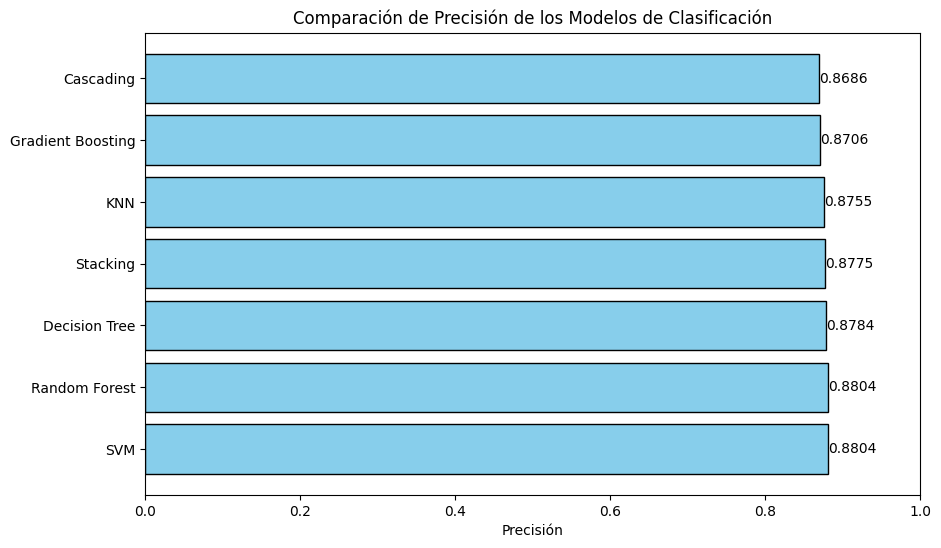

In [29]:
import numpy as np
import matplotlib.pyplot as plt

accuracies = [test_accuracy, test_accuracy_rf, test_accuracy_gb,
              test_accuracy_kn, test_accuracy_svm, np.mean(stacking_cross_val_accuracy),
              np.mean(cascading_cross_val_accuracy)]

model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN',
               'SVM', 'Stacking', 'Cascading']

sorted_indices = np.argsort(accuracies)[::-1]
sorted_accuracies = [accuracies[i] for i in sorted_indices]
sorted_model_names = [model_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_model_names, sorted_accuracies, color='skyblue', edgecolor='black')
plt.xlabel('Precisión')
plt.title('Comparación de Precisión de los Modelos de Clasificación')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 4), ha='left', va='center')

plt.xlim(0, 1)
plt.show()

<div class="alert alert-block alert-success">
<strong>Respuesta:

Al realizar el grafico de barras ordenador de menor a mayor precision podemos llegar a la conclusion de que las precisiones de los modelos son bastante parecidas siendo un 1.90% de variabilidad entre el mejor modelo y el peor.

Debido a la gran cantidad de datos que se maneja es de crucial importancia ese 1 % ya que podria equivaler a la mal clasificacion o prediccion de mas de 1000 casos segun las dimensiones del conjuntos de datos.

Finalmente el mejor modelo a escoger seria entre SVM o Random forest y por ultimo el Cascading entre el arbol de decision, KNN y SVM. </strong>


</div>

# 2. Clasificación secuencial y paralela con redes neuronales NNs (2.5 ptos)

### Objetivo:
Comprender e implementar modelos de redes neuronales secuenciales y paralelas para la clasificación utilizando el conjunto de datos de Iris. Esta parte del PEC proporciona información sobre diferentes arquitecturas de redes neuronales y su aplicación en tareas de clasificación. La elección entre modelos secuenciales y paralelos depende de los requisitos específicos y la complejidad del conjunto de datos y la tarea.

### Tools y Libraries:
Python
Colab o Jupyter Notebook (o cualquier Python IDE). Recomendación: utilizar Colab.
Libraries: NumPy, Pandas, Scikit-learn, TensorFlow/Keras

#### En caso de NO utilizar Colab: Configurar un entorno virtual (opcional pero recomendado)

 Es una buena práctica utilizar un entorno virtual para sus proyectos de Python para evitar conflictos de dependencia. Puede crear un entorno virtual usando venv (integrado en Python) o conda (si está usando Anaconda).

Using venv:

1. **python -m venv myenv**

Para activar el environment:

En Windows: myenv\Scripts\activate
En macOS y Linux: source myenv/bin/activate

Utilizando conda:

2. **conda create -n myenv python=3.8**

3. **conda activate myenv**
   
#### Instalar TensorFlow
Keras se incluye como parte de TensorFlow, por lo que solo necesita instalar TensorFlow. Correr:

4. **pip install tensorflow**
Este comando instala TensorFlow y Keras. Puede especificar una versión si es necesario (por ejemplo, tensorflow==2.4.0).


#### Verificación de la instalación
Después de la instalación, puede verificar que todo es correcto si ejecuta un script simple de Keras/TensorFlow.

Si ve el siguiente mensaje "NOMBRE_DE_SU_ARCHIVO.ipynb no es de confianza" en su terminal (si está trabajando en una Mac). Esto hace referencia a una característica de seguridad en Jupyter. Los notebooks de Jupyter pueden contener código ejecutable y, por razones de seguridad, cuando se abre un cuaderno desde una fuente que no es de confianza (como si se descarga de Internet o se recibe de otra persona), Jupyter lo marca como "no confiable". Esto significa que el código no se ejecutará automáticamente hasta que haya revisado el contenido y confíe en la fuente.

Para confiar y ejecutar el notebook:

1. Abra el cuadenotebook en Jupyter.
2. Revise el código para asegurarse de que sea seguro y haga lo que espera.
3. Si está seguro de que el portátil es seguro, puede marcarlo como confiable. Por lo general, esto se puede hacer a través de una opción de menú en Jupyter, a menudo en "Archivo" o un menú similar.

Después de marcar el notebook como confiable, podrá ejecutar el código que contiene sin más advertencias. Recuerde, es importante confiar en los portátiles sólo cuando esté seguro de su seguridad y origen, para evitar ejecutar código potencialmente dañino.

## 2.1. Entorno de configuración
Primero, asegúrese de que todas las libraries necesarias estén instaladas. Puede instalarlos usando pip (instalador de paquetes de Python).

In [30]:
!pip install numpy pandas scikit-learn tensorflow keras

Después cargue las libraries:

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris
from keras.models import Model
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


## 2.2. Cargada del conjunto de datos
El conjunto de datos Iris es un conjunto de datos clásico en el campo del aprendizaje automático y la estadística, que se utiliza a menudo con fines didácticos. Está ampliamente disponible y se puede acceder fácilmente en Python, particularmente a través de bibliotecas como Scikit-learn. Asegúrese que lo tiene instalado.

      # Cargar conjunto de datos de Iris
      iris = load_iris()
      X = iris.data
      y = iris.target
    
 `X` debe contener las características o variables (medidas de las flores del iris) y `y` debe contener las etiquetas de destino (especies de las flores del iris).

- **Data (`X`):** Esta es una matriz 2D donde cada fila representa una flor de iris y cada columna representa una característica específica de la flor. En el caso del conjunto de datos de Iris, estas características son la longitud del sépalo, el ancho del sépalo, la longitud del pétalo y el ancho del pétalo, todos medidos en centímetros.
- **Objetivo (`y`):** Esta es una matriz 1D que contiene las etiquetas u objetivos. Para el conjunto de datos Iris, estas etiquetas corresponden a las especies de flor de iris. Hay tres especies: Setosa, Versicolor y Virginica, representadas como 0, 1 y 2, respectivamente.

El objetivo es categorizar las flores según sus medidas físicas.

In [96]:
iris = load_iris()
X = iris.data
y = iris.target


### 2.2.1. Preprocesamiento de datos:

Normalice los datos utilizando el StandardScaler.


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Codifique las etiquetas categóricas si es necesario.

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Realizar un split del 30% y utilizar un random_state de 42

In [99]:
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.fit_transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 2.3. Modelo de red neuronal secuencial (0.75 ptos)
Cree y entrene un modelo de red neuronal secuencial.

### Arquitectura modelo:

Tiene que construir un modelo secuencial que llamará model_seq con tres capas: dos capas ocultas con 64 neuronas cada una y una capa de salida con 3 neuronas.
La función de activación relu debe usarse en las capas ocultas y softmax debe usarse en la capa de salida que es apropiada para clasificación de clases múltiples como el conjunto de datos Iris.

### Compilación de modelos:

El modelo debe compilarse con el optimizador Adam. Adam es una opción popular para muchas tareas de redes neuronales, ya que combina las ventajas de otras dos extensiones del descenso de gradiente estocástico, específicamente el algoritmo de gradiente adaptativo (AdaGrad) y la propagación cuadrática media (RMSProp).
categorical_crossentropy debería ser la función de pérdida, que es estándar para problemas de clasificación de clases múltiples.

### Entrenando el modelo:

El modelo se entrenará durante 50 épocas (epochs) con un tamaño de lote de 10 (batch_size).
El parámetro detallado = 1 (verbose) en ajuste mostrará una barra de progreso durante el entrenamiento, lo que puede ser útil para monitorear el proceso de entrenamiento.

In [100]:
# Crear modelo secuencial
model_seq = Sequential()

# Agregar capas al modelo
model_seq.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model_seq.add(Dense(64, activation='relu'))
model_seq.add(Dense(3, activation='softmax'))

# Compilar el modelo
model_seq.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_seq = model_seq.fit(X_train_scaled, y_train_onehot, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
11/11 [==============================] - 1s 2ms/step - loss: 0.9731 - accuracy: 0.6190
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 0.7232 - accuracy: 0.7810
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.8095
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.8381
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8476
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8571
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.8667
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8667
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8952
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.9048
Epoch 11/50
11/11 [

## 2.4. Modelo de red neuronal paralela (0.75 ptos)
Cree y entrene un modelo de red neuronal paralela al que llamará model_par.

En este modelo, debe definir dos rutas de entrada separadas que eventualmente se fusionarán antes de conducir a la capa de salida. Este tipo de arquitectura puede resultar útil en casos en los que su modelo necesita aprender de dos conjuntos diferentes de características o representaciones de datos.

### Defina dos rutas de entrada:

input_a y input_b se definirán como dos entradas separadas. Ambos esperan datos de forma (X_train.shape[1],), que es la cantidad de funciones en su conjunto de datos.

### Capas paralelas:

path_a y path_b representan dos capas (o rutas) paralelas en la red. Cada uno procesará su entrada de forma independiente.
Ambas rutas deben tener una capa densa con 64 neuronas y utilizar la función de activación ReLU.

### Concatenación de rutas:

La capa de concatenación fusionará las salidas de path_a y path_b. Esto permitirá que el modelo aprenda de ambas vías simultáneamente.

### Capa de salida:

La capa de salida debe ser una capa densa con 3 neuronas y una función de activación softmax, adecuada para clasificación de clases múltiples.

### Construyendo y compilando el modelo:

El modelo (model_par) debe definirse con dos entradas y una salida.
Se compilará con el optimizador Adam y la función de pérdida categorical_crossentropy, que son estándar para tareas de clasificación.

### Entrenando el modelo:

El modelo debe entrenarse en X_train para ambas entradas ([X_train, X_train]). Esto implicará que está alimentando los mismos datos a través de ambas rutas.
Las etiquetas de destino (y_train) deben usarse para el entrenamiento.
El modelo se entrenará durante 50 épocas (epochs) con un tamaño de lote de 10 (batch_size).
El parámetro detallado = 1 (verbose) en ajuste mostrará una barra de progreso durante el entrenamiento, lo que puede ser útil para monitorear el proceso de entrenamiento.

In [101]:
from keras.layers import Input, Dense, concatenate
from keras.models import Model
from keras.optimizers import Adam

# Definir dos rutas de entrada
input_a = Input(shape=(X_train_scaled.shape[1],))
input_b = Input(shape=(X_train_scaled.shape[1],))

# Capas paralelas
path_a = Dense(64, activation='relu')(input_a)
path_b = Dense(64, activation='relu')(input_b)

# Concatenación de rutas
concatenated = concatenate([path_a, path_b])

# Capa de salida
output = Dense(3, activation='softmax')(concatenated)

# Construir el modelo
model_par = Model(inputs=[input_a, input_b], outputs=output)

# Compilar el modelo
model_par.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_par = model_par.fit([X_train_scaled, X_train_scaled], y_train_onehot, epochs=50, batch_size=10, verbose=1)


Epoch 1/50
11/11 [==============================] - 3s 4ms/step - loss: 1.1941 - accuracy: 0.3524
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 0.9265 - accuracy: 0.5905
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.8095
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.8190
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.8286
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.8286
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8476
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8571
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8571
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8667
Epoch 11/50
11/11 [

## 2.5. Evaluación (0.5 ptos)
Evalúe (evaluate) ambos modelos en el conjunto de datos de prueba e imprima en pantalla la exactitud (accuracy) para cada uno de ellos.

In [102]:
# Evaluar el modelo secuencial en el conjunto de prueba
loss_seq, accuracy_seq = model_seq.evaluate(X_test_scaled, y_test_onehot, verbose=0)
print(f'Modelo Secuencial - Exactitud: {accuracy_seq * 100:.2f}%')

# Evaluar el modelo paralelo en el conjunto de prueba
loss_par, accuracy_par = model_par.evaluate([X_test_scaled, X_test_scaled], y_test_onehot, verbose=0)
print(f'Modelo Paralelo - Exactitud: {accuracy_par * 100:.2f}%')


Modelo Secuencial - Exactitud: 95.56%
Modelo Paralelo - Exactitud: 93.33%


## 2.6. Análisis (0.5 ptos)

Hay varias formas de presentar los resultados de la evaluación de los modelos, especialmente para tareas de clasificación. Dos métodos comúnmente utilizados son la matriz de confusión y las curvas de característica operativa del receptor (ROC). Estos métodos nos brindan una mejor comprensión del rendimiento del modelo más allá de la precisión.

Matriz de confusión: una matriz de confusión es una tabla que se utiliza a menudo para describir el rendimiento de un modelo de clasificación en un conjunto de datos de prueba. Ayuda a visualizar el rendimiento de un algoritmo.

Curva ROC y AUC. La curva ROC es una representación gráfica de la capacidad de diagnóstico de un sistema clasificador binario. Para la clasificación de clases múltiples, las curvas ROC se pueden extender para trazar las curvas ROC micropromedio y macropromedio.

Compare el rendimiento de los modelos secuencial y paralelo.
Analice las fortalezas y debilidades de cada enfoque.

2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 6ms/step


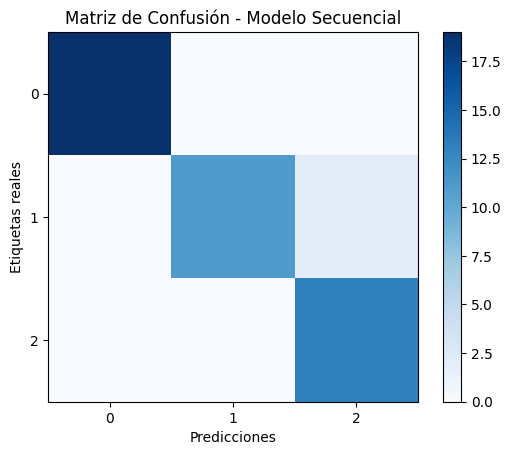

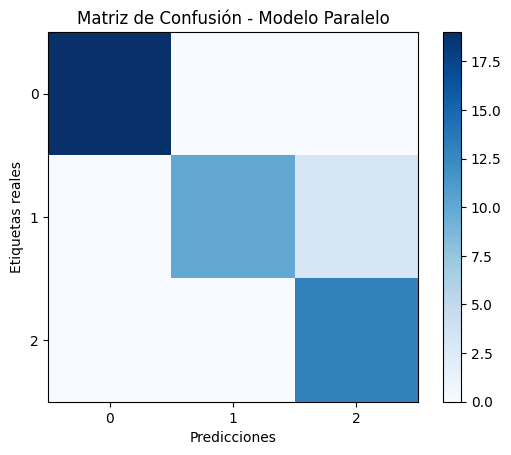

<ipython-input-103-a8ecb2258a45>:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)


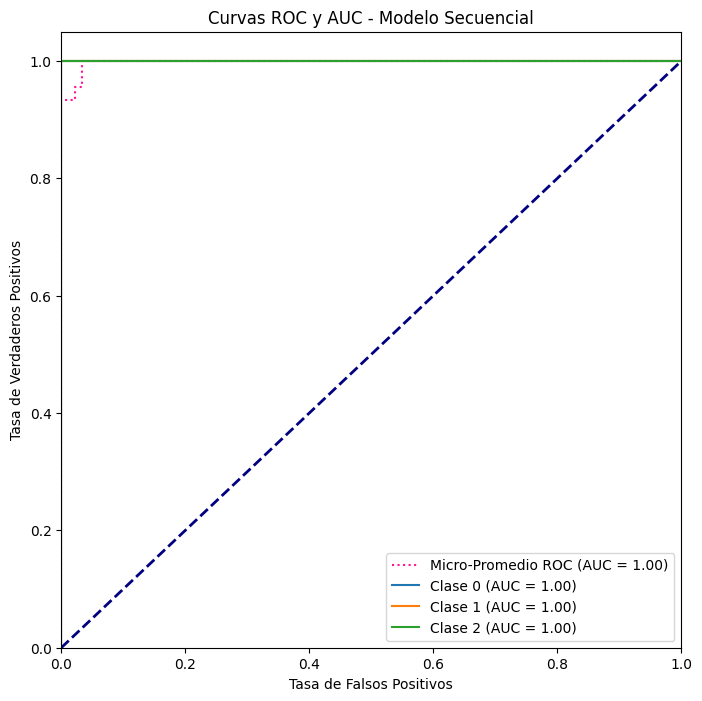

<ipython-input-103-a8ecb2258a45>:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)


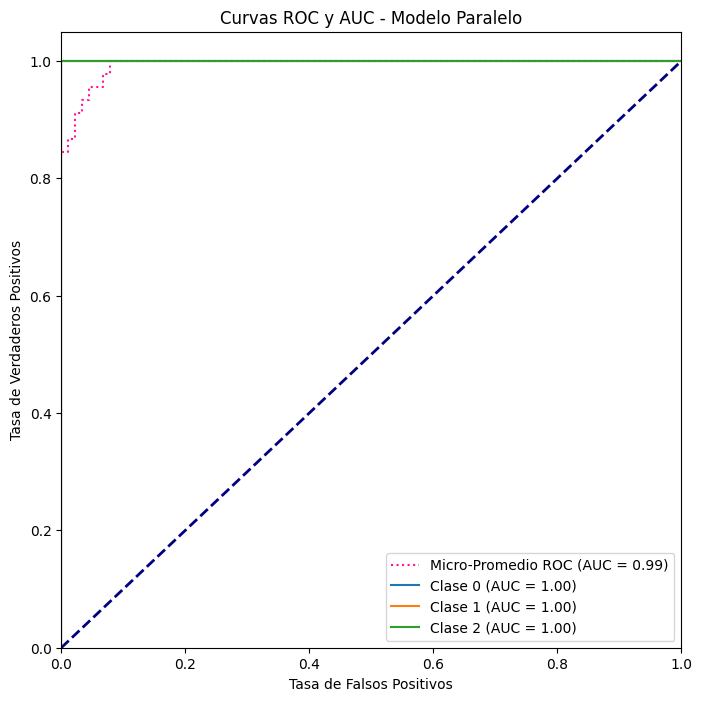

In [103]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

y_pred_seq = model_seq.predict(X_test_scaled)
y_pred_par = model_par.predict([X_test_scaled, X_test_scaled])

y_pred_seq_labels = np.argmax(y_pred_seq, axis=1)
y_pred_par_labels = np.argmax(y_pred_par, axis=1)

def plot_confusion_matrix(y_true, y_pred_labels, title):
    cm = confusion_matrix(y_true, y_pred_labels)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    classes = [0, 1, 2]
    tick_marks = classes
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas reales')
    plt.show()

def plot_roc_curve(y_true, y_pred_prob, title):
    n_classes = y_true.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["macro"], tpr["macro"], _ = roc_curve(y_true.ravel(), y_pred_prob.ravel())
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(8, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-Promedio ROC (AUC = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':')

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_confusion_matrix(y_test, y_pred_seq_labels, 'Matriz de Confusión - Modelo Secuencial')
plot_confusion_matrix(y_test, y_pred_par_labels, 'Matriz de Confusión - Modelo Paralelo')

plot_roc_curve(y_test_onehot, y_pred_seq, 'Curvas ROC y AUC - Modelo Secuencial')
plot_roc_curve(y_test_onehot, y_pred_par, 'Curvas ROC y AUC - Modelo Paralelo')
